Timothée Strouk

In [2]:
# Install rdkit
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 35.9 MB/s eta 0:00:00


In [4]:
import rdkit
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import rdkit.ML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit.Chem import AllChem
import rdkit.ML.Descriptors.MoleculeDescriptors
from rdkit.Chem.Descriptors import descList
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## Ex 1. Read molecules from SMILES

SMILES (Simplified Molecular-Input Line-Entry System) is a popular method for specifying molecules with text string. The RDkit library provides utilities to read molecules from SMILES.


Paracetamol (Acetaminophen) is a commonly used medicine that can help treat pain and reduce a high temperature. It's given by the chemical formula $ C_8H_9N O_2$ and its SMILES is "CC(=O)NC1=CC=C(O)C=C1".


1. Create the paracetamol molecule from its SMILES using the rdkit.Chem.MolFromSmiles class.


2. Visualize its structure (it's sufficient to print the paracetamol molecule or to use rdkit.Chem.Draw.MolToImage())


3. Print out the number of atoms. Did you get 11 ? It should be 20 atoms ? Why ?



4. Print out the list of atoms.


5. Find the number of bonds.



In [ ]:
paracetamol = rdkit.Chem.MolFromSmiles("CC(=O)NC1=CC=C(O)C=C1")

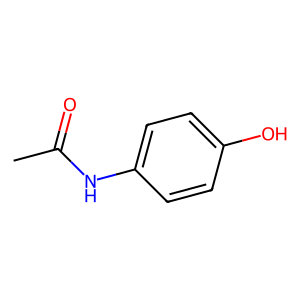

In [ ]:
rdkit.Chem.Draw.MolToImage(paracetamol)

In [ ]:
paracetamol.GetNumAtoms()

11

There are 11 atoms other than hydrogen in the paracetamol molecule. We deduce that hydrogen atoms are ignored.

In [ ]:
for atom in paracetamol.GetAtoms():
    print(atom.GetSymbol())

C
C
O
N
C
C
C
C
O
C
C


In [1]:
print(f"Hydrogens not included: {paracetamol.GetNumBonds()}")
print(f"Hydrogens included: {paracetamol.GetNumBonds(onlyHeavy=False)}")

NameError: ignored

## Ex 2 Read data from chemical file format

Apart SMILES, .SDF/ .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at
"https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf".


1. Download this file and save it in a folder.


2. Read the morphine molecule from the file that you've downloaded using "rdkit.Chem.SDMolSupplier"


3. With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect, compute its fingerprint as a bit vector.

1. Downloading and saving the morphine mollecule in a folder

In [4]:
MOLECULE_FOLDER = "molecules"

In [6]:
!mkdir "molecules"
!wget https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf
!mv DB00295.sdf "molecules/"

mkdir: cannot create directory ‘molecules’: File exists
--2023-09-25 09:58:51--  https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf
Resolving go.drugbank.com (go.drugbank.com)... 172.66.41.6, 172.66.42.250, 2606:4700:3108::ac42:2906, ...
Connecting to go.drugbank.com (go.drugbank.com)|172.66.41.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘DB00295.sdf.1’

DB00295.sdf.1           [ <=>                ]   7.38K  --.-KB/s    in 0s      

2023-09-25 09:58:51 (48.3 MB/s) - ‘DB00295.sdf.1’ saved [7559]



2. Reading the morphine molecule

In [7]:
morphine = rdkit.Chem.SDMolSupplier("molecules" + "/DB00295.sdf")[0]

In [8]:
morphine_fingerprint = rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect(morphine, 2)

In [ ]:
morphine_fingerprint.ToBitString()

'000000000000000000000000000000000000000000000000000000000000000000010000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000100000000000000000000000000000000000000000000000000000000000000001000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000100000000001000000000000000000000000000000000000000000000000000000001000000000000001000000000010010000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000001000000001000010000000000000000000000000000000000000000000000000000000000

## EX3. Fingerprints


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.



1. Compute the fingerprint of the paracetamol as bit vector by using the rdkit.AllChem.GetMorganFingerprintAsBitVectCompute Class. Convert it to a numpy vector. Known that Paracetamol's SMILES is ""CC(=O)OC1=CC=CC=C1C(O)=O". Choose the number of bits nBits= 1024. Find the elements that are nonzero of the vector.

2. Do the same thing for the aspirin. Aspirin's SMILES is "CC(=O)NC1=CC=C(O)C=C1".



3. Using rdkit.DataStructs.DiceSimilarity(), compute the DiceSimilarity between the fingerprints of the paracetamol and the aspirin.

In [9]:
bit_vector = {}
paracetamol = rdkit.Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(O)=O")
paracetamol_fingerprint = rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect(paracetamol, 2,
                                                                  nBits=1024, bitInfo = bit_vector)

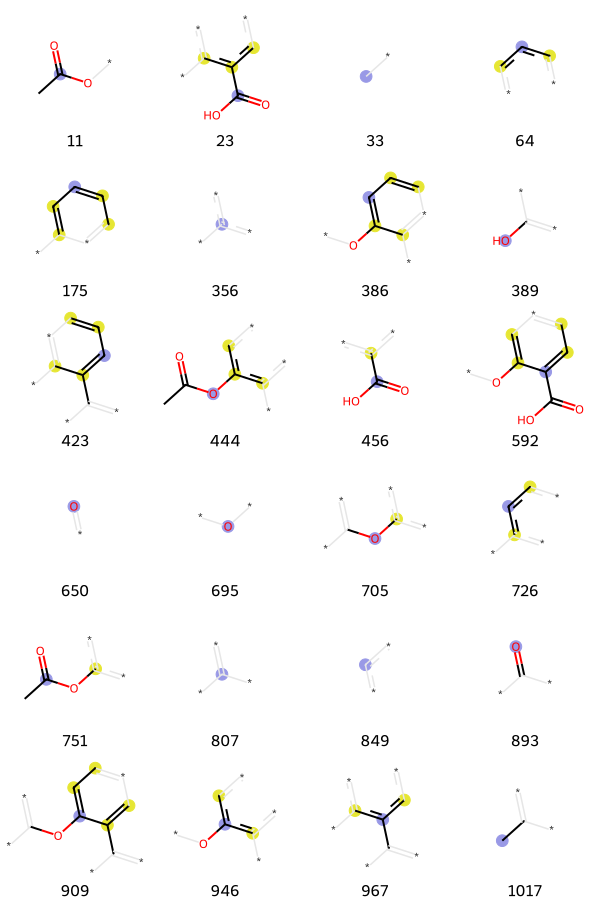

In [11]:
lb = [(paracetamol, x, bit_vector) for x in paracetamol_fingerprint.GetOnBits()]
Draw.DrawMorganBits(lb, molsPerRow=4, legends=[str(x) for x in paracetamol_fingerprint.GetOnBits()])

In [14]:
aspirin = rdkit.Chem.MolFromSmiles("CC(=O)NC1=CC=C(O)C=C1")
bit_vector = {}
aspirin_fingerprint = rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect(aspirin,2, nBits=1024,
                                                              bitInfo = bit_vector)

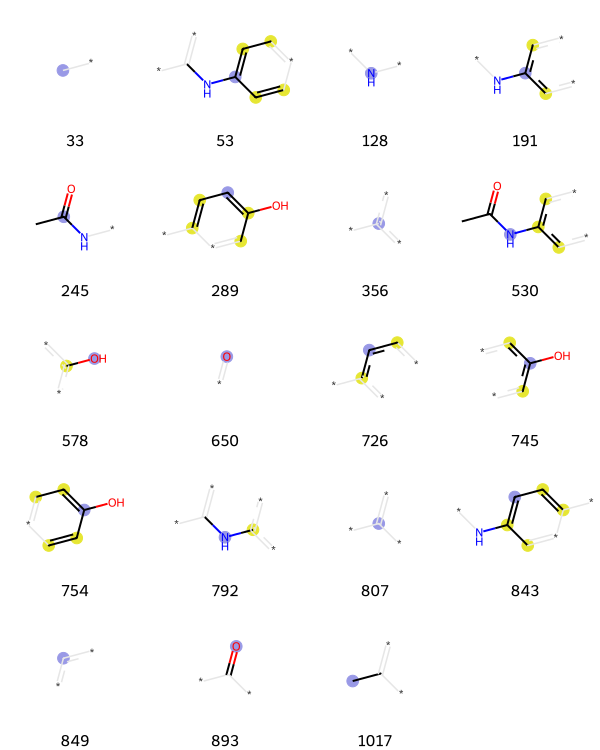

In [15]:
lb = [(aspirin, x, bit_vector) for x in aspirin_fingerprint.GetOnBits()]
Draw.DrawMorganBits(lb, molsPerRow=4, legends=[str(x) for x in aspirin_fingerprint.GetOnBits()])

In [16]:
rdkit.DataStructs.DiceSimilarity(paracetamol_fingerprint, aspirin_fingerprint)

0.37209302325581395

## EX 4: Descriptors

Molecules are also described by a set of physiochemical descriptors. They should be the log partition coefficient, the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.
Using the rdkit.ML.Descriptors.MoleculeDescriptors.MolecularDescriptorCalculator class, compute the descriptor for paracetamol molecule from SMILES string. Note that SMILES string for paracetamol is "CC(=O)NC1=CC=C(O)C=C1"



In [18]:
paracetamol = rdkit.Chem.MolFromSmiles("CC(=O)NC1=CC=C(O)C=C1")

In [19]:
descriptor = rdkit.ML.Descriptors.MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in descList])


In [20]:
descriptor.CalcDescriptors(paracetamol)

(10.524468537414966,
 -0.11510204081632636,
 10.524468537414966,
 0.11510204081632636,
 0.5950261967780849,
 151.165,
 142.093,
 151.063328528,
 58,
 0,
 0.22074743631242583,
 -0.5079643157925783,
 0.5079643157925783,
 0.22074743631242583,
 1.3636363636363635,
 1.9090909090909092,
 2.3636363636363638,
 16.25468871437965,
 10.280190859964755,
 1.9280360590359866,
 -1.9945540738765895,
 2.12524757916018,
 -2.04401131261029,
 5.88095478459792,
 -0.11373578338266109,
 2.7362980721056545,
 253.29949758389105,
 8.267584713501616,
 6.164862962722325,
 6.164862962722325,
 5.1815405503520555,
 3.2490981480278296,
 3.2490981480278296,
 2.228060242189872,
 2.228060242189872,
 1.1876733148984595,
 1.1876733148984595,
 0.7480265991539318,
 0.7480265991539318,
 -1.5099999999999998,
 285.51074052739676,
 7.595374077976819,
 3.0531381005525,
 2.292303972882069,
 64.66690538413799,
 10.423315998847038,
 5.749511833283905,
 0.0,
 5.907179729351506,
 0.0,
 0.0,
 4.794537184071822,
 0.0,
 0.0,
 0.0,
 0.0,

## Ex5: SMART

In many commonly used applications, we need to determine whether atoms in a molecule match a particular pattern. It can be used for filtering structures or identifying substructures that are associated with toxicological problem.

SMART us an extension of the SMILES language that can be used to create queries.

1. Find molecules in the following list named "smiles_list" that contain the "CCC" pattern (you can use the GetSubstructMatch class).


2. Highlight the pattern "CCC" in these molecules.


3. Do the same thing ex 1 but for the pattern "C(=O)N".

In [27]:
smiles_list = ["CCCCC","CCOCC","CCNCC","CC(=O)NC1=CC=C(O)C=C1", "CC(=O)NC1=CC=C(O[13CH3])C=C1", "CN(C(=O)C(Cl)Cl)C1=CC=C(O)C=C1"]


In [29]:
pattern1 = Chem.MolFromSmarts("CCC")

molecules_with_pattern1 = []

for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        if mol.HasSubstructMatch(pattern1):
            molecules_with_pattern1.append(mol)

for mol in molecules_with_pattern1:
    AllChem.Compute2DCoords(mol)
    Draw.MolToImage(mol, kekulize=True)

In [30]:
pattern2 = Chem.MolFromSmarts("C(=O)N")

molecules_with_pattern2 = []

for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        if mol.HasSubstructMatch(pattern2):
            molecules_with_pattern2.append(mol)

for mol in molecules_with_pattern2:
    AllChem.Compute2DCoords(mol)
    Draw.MolToImage(mol, kekulize=True)


## Ex6: Machine learning with RDkit - Predict solubility

In this exercise, we will use machine learning to predict solubility of molecules. For this purpose, we will borrow a dataset from rdkit that is originated from the Huuskonen dataset. We will try to predict Aqueous Solubility for molecules that is known as "logS".


This exercise is divided into 3 parts: Preparing a dataset, training a model and preparing dataset for prediction and applying a predictive model.



## EX6.I Preparing dataset

Preparing dataset requires a few steps:


1. Download file from "https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf".


2. With the help of rdkit.Chem.SDMolSupplier, get list of molecules contained in this file. You should call this list as **molecule_list**. The option **removeHs=False** should be chosen.


3. Write a function named **calculate_descriptors(mol)** that allows us to calculate descriptors of a molecule. This function takes a Rdkit molecule as input and returns an array vector of descriptors.


4. Apply the function **caluclate_descriptors** to the list of molecules **molecule_list** and store the result in a dataframe named **df**. Look at few rows of **df** to see whether the descriptors are calculated.


5. For each molecule from this dataset, we can get the aqueous solubility (logS) via attribute **getProp('SOL')**. Create a list that contains the aqueous solubility of all molecules from the **molecule_list** list. You should call this list by **labels**. Remember to convert these values to float format.


6. Plot the histogram of the "labels" list to see the distribution of the solubility of molecules. Do you have some comments about the aqueous solubility of molecules ?



In [ ]:
# Q1
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf

--2023-09-20 22:00:09--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1376487 (1.3M) [text/plain]
Saving to: ‘solubility.train.sdf.4’

solubility.train.sd 100%[===================>]   1.31M  --.-KB/s    in 0.04s   

2023-09-20 22:00:09 (31.0 MB/s) - ‘solubility.train.sdf.4’ saved [1376487/1376487]



In [ ]:
# Q2
molecule_list = rdkit.Chem.SDMolSupplier("solubility.train.sdf", removeHs=False)

In [ ]:
# Q3
def calculate_descriptors(mol):
    calc = rdkit.ML.Descriptors.MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in descList])
    arr = calc.CalcDescriptors(mol)
    return np.array(arr)

In [ ]:
# Q4
columns = [x[0] for x in descList]
data = [calculate_descriptors(x) for x in molecule_list]
df = pd.DataFrame(data = data, columns = columns)
df

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,2.211806,1.343750,2.211806,1.343750,0.468786,72.151,60.055,72.093900,32.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.500000,1.500000,1.500000,1.500000,0.408362,70.135,60.055,70.078250,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.231806,1.355000,2.231806,1.355000,0.462954,86.178,72.066,86.109550,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.253472,0.898148,2.253472,0.898148,0.483890,86.178,72.066,86.109550,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.243056,0.541667,2.243056,0.541667,0.424482,86.178,72.066,86.109550,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,13.185826,-1.627805,13.185826,0.003051,0.648763,444.568,408.280,444.251189,176.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1021,12.042248,-1.044559,12.042248,0.066834,0.410290,465.631,422.287,465.309038,188.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1022,13.125689,-2.328350,13.125689,0.037157,0.574043,385.416,362.232,385.152537,148.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1023,13.235654,-1.605971,13.235654,0.033093,0.619599,460.611,420.291,460.282489,184.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Q5
labels = [float(x.GetProp('SOL')) for x in molecule_list]

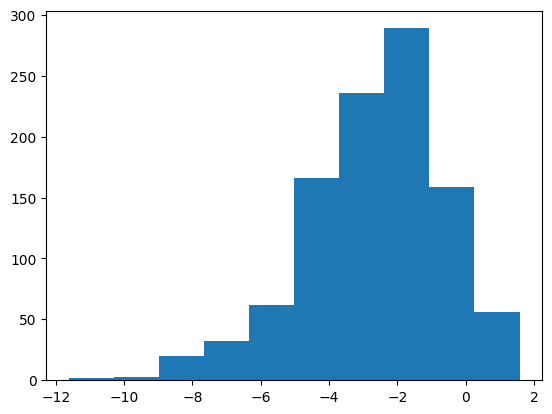

In [ ]:
# Q6
plt.hist(labels)
plt.show()

It looks like a gaussian distribution

## Ex6.II Feature Engineering and Training a model of regression.

Now, we have the **df** dataframe that contains the descriptors for molecules and the **labels** list that contains the solvant property of molecules.

1. Check the dataframe **df** to see whether it contains NaN values. How many row contained NaN values are there in the dataframe **df** ? Remove these rows from  **df** and **labels**.


2. Apply the MinMaxScaler to the dataframe **df** to normalize the data.


3. Construct and train a regression model.


4. Calculate the square root error for the dataset

In [7]:
# Q1

print(f"There are {len(df.index) - len(df.dropna().index)} rows that contain NaN values")

NameError: ignored

In [ ]:
new_labels = []
for i in range(len(df.index)):
    if df.iloc[i].hasnans:
        print(f"Deleting number {i}")
        continue
    new_labels.append(labels[i])
labels = new_labels

df = df.dropna()

Deleting number 985


In [5]:
# Q2

scaler = MinMaxScaler()
scaler.fit(df)

normalized_df = pd.DataFrame(columns = df.columns, data = scaler.transform(df))
normalized_df

NameError: ignored

In [6]:
# Q3

linear_ref = LinearRegression()
linear_ref.fit(normalized_df, labels)

np.sqrt(mean_squared_error(linear_ref.predict(normalized_df), labels))

NameError: ignored

## Ex6.III Prepare data for test  and test model


1. Download file from "https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf".

2. Read molecules from this file and store them in a list named **list_molecule_test**.


3. Take a molecule from the **list_molecule_test** and then calculate its descriptions thank to the **calculate_descriptors(mol)** function that you've coded above.


4. Apply **minmaxscaler** to these descriptors. Note that **minmaxscaler**  is one that you've created at Ex6.II.


5. Use the model that you've trained to predict the aqueous solubility (logS) of the molecule. Compare to the real logS value of the molecule.

6. (Optional) Calculate the mean square root error of the model for this dataset.



Note: If there exists problem of reading the file solubility.test.sdf as
"RDKit ERROR: [09:28:36] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [09:32:48] ERROR: Counts line too short: '' on line4"
so, go to the url, click "raw" and save this file by hand. The error will be gone away


In [ ]:
# Q1
!wget https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf

--2023-09-20 22:00:32--  https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 327938 (320K) [text/plain]
Saving to: ‘solubility.test.sdf.4’

solubility.test.sdf 100%[===================>] 320.25K  1.03MB/s    in 0.3s    

2023-09-20 22:00:33 (1.03 MB/s) - ‘solubility.test.sdf.4’ saved [327938/327938]



In [ ]:
# Q2
list_molecule_test = rdkit.Chem.SDMolSupplier("solubility.test.sdf", removeHs=False)

In [ ]:
# Q3
mol = list_molecule_test[0]
data = calculate_descriptors(mol)

label = mol.GetProp('SOL')

In [ ]:
# Q4
scaled_data = scaler.transform([data])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Q5
pred = linear_ref.predict(scaled_data)
pred[0] - float(label)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.28569763183593766